In [29]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt


resolution = 30 #pixels/micron

freq = 1/1.55 # We work typically at 1550 nm wavelength (1.55 micron)
sio2 = mp.Medium(index=1.444) # glass surrounding waveguide

cell = mp.Vector3(16,8,0)
geometry = [mp.Block(mp.Vector3(mp.inf,0.5,mp.inf),
                     center=mp.Vector3(),
                     material=mp.Medium(epsilon=12))]

# sources = [mp.Source(mp.ContinuousSource(frequency=freq),
#                      component=mp.Ez,
#                      center=mp.Vector3(-4,0),
#                      size=mp.Vector3(y=4))]

sources = [mp.EigenModeSource(mp.ContinuousSource(frequency=freq),
                     center=mp.Vector3(-4,0),
                     size=mp.Vector3(y=4),
                     direction=mp.X,
                     eig_band=1)
                     ]


pml_layers = [mp.PML(1.0)]



In [30]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution,
                    default_material=sio2)

flux = sim.add_mode_monitor(freq, 0, 1, 
                            mp.ModeRegion(center=mp.Vector3(x=5),size=mp.Vector3(y=4)), 
                            decimation_factor=0)

fluxStart = sim.add_mode_monitor(freq, 0, 1, 
                            mp.ModeRegion(center=mp.Vector3(x=-3),size=mp.Vector3(y=4)), 
                            decimation_factor=0)

sim.run(until=200)


-----------
Initializing structure...
time for choose_chunkdivision = 0.00019002 s
Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 30
     block, center = (0,0,0)
          size (1e+20,0.5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.115169 s
-----------
MPB solved for frequency_1(2.2349,0,0) = 0.683514 after 28 iters
MPB solved for frequency_1(2.09792,0,0) = 0.645191 after 7 iters
MPB solved for frequency_1(2.09781,0,0) = 0.645161 after 4 iters
MPB solved for frequency_1(2.09781,0,0) = 0.645161 after 1 iters


FloatProgress(value=0.0, description='0% done ', max=200.0)

Meep progress: 77.13333333333333/200.0 = 38.6% done in 4.0s, 6.4s to go
on time step 4630 (time=77.1667), 0.000864059 s/step
Meep progress: 158.65/200.0 = 79.3% done in 8.0s, 2.1s to go
on time step 9522 (time=158.7), 0.000817737 s/step
run 0 finished at t = 200.0 (12000 timesteps)


In [31]:

# eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
# plt.figure()
# plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
# plt.axis('off')
# plt.show()

# ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez)
# plt.figure()
# plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
# plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
# plt.axis('off')
# plt.show()

     block, center = (0,0,0)
          size (1e+20,0.5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)


<Axes: xlabel='X', ylabel='Y'>

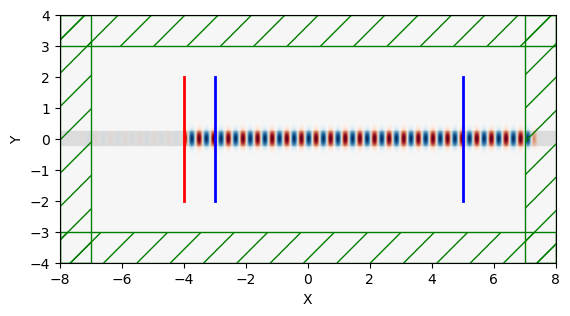

In [32]:
sim.plot2D(fields=mp.Ez, 
           field_parameters={'alpha':0.9})

In [33]:
res = sim.get_eigenmode_coefficients(flux,bands=[1])

MPB solved for frequency_1(2.2349,0,0) = 0.683514 after 28 iters
MPB solved for frequency_1(2.09792,0,0) = 0.645191 after 7 iters
MPB solved for frequency_1(2.09781,0,0) = 0.645161 after 4 iters
MPB solved for frequency_1(2.09781,0,0) = 0.645161 after 1 iters
Dominant planewave for band 1: (2.097813,-0.000000,0.000000)


In [34]:
t = res.alpha[0][0][0]
np.abs(t)**2

4523.67418356675

In [35]:
mp.get_fluxes(flux)

[4524.959028526983]

In [36]:
sources[0]

In [37]:
mp.get_fluxes(fluxStart)

[6251.934982370236]